In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
import nltk
from utils.DataProcessing import process_tweet
from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #for creating Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
import re

print("Succesfully Imported the given LIBRARIES")

Succesfully Imported the given LIBRARIES


In [76]:
df=pd.read_csv(r'C:\Users\ganeshmaruti\Desktop\DSE\NLP\Krish Naik ( NLP )\Fake News Detection\Fake-News-Classifier-master\fake-news\train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [77]:
df=df.iloc[:,1:]
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [78]:
df.shape

(20800, 4)

In [79]:
round(df.isnull().mean() *100,3)

title     2.683
author    9.409
text      0.188
label     0.000
dtype: float64

In [80]:
#either way you can find the percentage of null values
(df.isnull().sum()/len(df))*100

title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

Data set is about to classify the given message is fake(0) or real(1) based on the given text

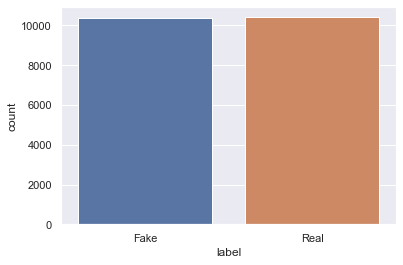

In [81]:
sns.countplot(x='label',data=df)
plt.xticks(np.arange(2),["Fake","Real"])
plt.show()

In [82]:
###This shows that data is balanced

In [83]:
df=df.dropna()
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [84]:
# X=df.drop('label',axis=1)
y=df['label']

In [85]:
# messages=X.copy()

In [86]:
# messages.reset_index(inplace=True,drop=True)


In [87]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [88]:
nltk.download('stopwords')
# stopwords=stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganeshmaruti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
def process_text(x):
    corpus_test = []
    for i in range(0, len(x)):
        review = re.sub('[^a-zA-Z]', ' ', x['text'][i])
        review = review.lower()
        review = review.split()
#     print(review)
#     review=[ps.stem(word) for word in review if not word in all_stopwords]
        review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
        
    return corpus_test

In [90]:
lemmatizer=WordNetLemmatizer()

In [ ]:
lemmatizer=WordNetLemmatizer()
# messages=df.copy()
ps = PorterStemmer()
corpus = []
lemmatizer=WordNetLemmatizer()
ps = PorterStemmer()

corpus = []
for i in range(0, len(df)):

    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
#     print(review)
#     review=[ps.stem(word) for word in review if not word in all_stopwords]
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

In [ ]:
cv=CountVectorizer(max_features=3000,ngram_range=(1, 2))
X=cv.fit_transform(corpus).toarray()


In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

print(y_test.shape)

In [ ]:
cv.get_feature_names()[:20]

In [ ]:
cv.get_params()

In [ ]:

count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

In [ ]:
y_pred=lg.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
test=pd.read_csv(r'C:\Users\ganeshmaruti\Desktop\DSE\NLP\Krish Naik ( NLP )\Fake News Detection\Fake-News-Classifier-master\fake-news\test.csv')

In [ ]:
test.head()

In [ ]:
test.isnull().mean()*100

In [ ]:
test.dropna(inplace=True)
test.reset_index(inplace=True,drop=True)

In [ ]:
process_text(test)

In [ ]:
corpus_test

In [ ]:
test=cv.transform(corpus_test).toarray()

In [ ]:
y_pred_test=cv.predict(test)
y_pred